<a href="https://colab.research.google.com/github/Jungsan005/Bigdata-Class/blob/master/%EC%84%9C%EC%9A%B8_%EB%B6%80%EB%8F%99%EC%82%B0%EB%A7%A4%EB%A7%A4_%EC%8B%9C%EA%B3%84%EC%97%B4_%EC%95%84%EB%A6%AC%EB%A7%88_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 



* 시계열을 분석하기 위해서는 시계열 모형을 만들어야 함
* 시계열 모형을 만들기 위해서는 데이터의 값이나 확률분포를
  수치화해야 하는데
* 데이터의 추세, 계절성이 있으면 시간에 따라 확률분포의 의미가
  달라지기 때문에 분석이 어려울 수 있음
* 따라서, 시계열 분석을 하려면, 추세, 계절성을 먼저 제거해야 함
* 단, RNN, LSTM등의 딥러닝 모델에서는 비선형적 모델을 분석하기
  때문에 안정 시계열로 변환할 필요는 없음

* 불안정한 시계열을 안정 시계열로 변환하는 방법
  + 로그변환
  + 차분
  + 이동평균


In [4]:
# 데이터 불러오기
seoul = pd.read_csv('https://raw.githubusercontent.com/Jungsan005/Bigdata-Class/master/seoul.csv')
seoul.head(5)

,year,month,price
0,2010,1,497.6
1,2010,2,481.1
2,2010,3,478.7
3,2010,4,471.2
4,2010,5,475.0


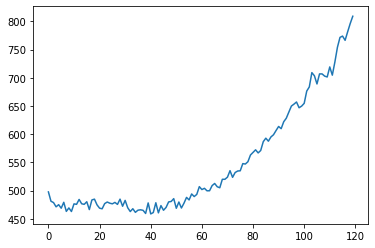

In [7]:
# 데이터 시각화
plt.plot(seoul.price)

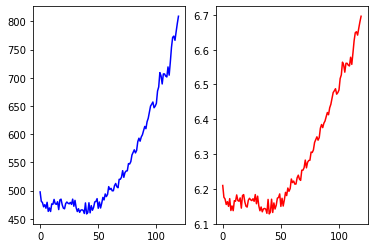

In [9]:
# 정상 시계열로 변환 1 : 로그변환
# 큰값은 작게, 작은값은 크게 조정함
seoul['logs'] = np.log(seoul.price)

# 그래프로 비교
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(seoul.price, 'b')
ax2.plot(seoul.logs, 'r')


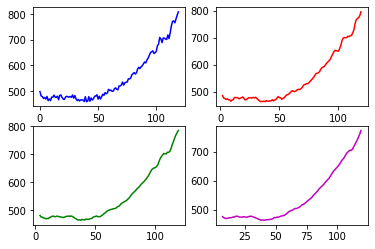

In [10]:
# 정상 시계열로 변환 2 : 이동평균 (n-MA)
# rolling(n) : n개의 관측치에 대한 평균 계산
seoul['sma3'] = seoul.price.rolling(3).mean()
seoul['sma5'] = seoul.price.rolling(5).mean()
seoul['sma8'] = seoul.price.rolling(8).mean()

# 그래프로 비교
fig, ax = plt.subplots(2,2)
ax[0,0].plot(seoul.price, 'b')
ax[0,1].plot(seoul.sma3, 'r')
ax[1,0].plot(seoul.sma5, 'g')
ax[1,1].plot(seoul.sma8, 'm')

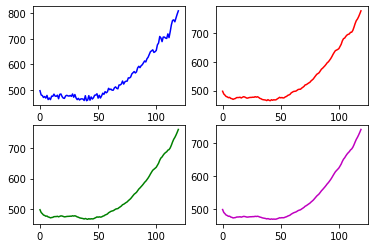

In [11]:
# 정상 시계열로 변환 2 : 지수이동평균 (n-EMA)
# 보다 최근값에 가중치를 두면서 이동평균을 계산
# ewm(n) : n개의 관측치에 대한 지수이동평균 
seoul['ema3'] = seoul.price.ewm(3).mean()
seoul['ema5'] = seoul.price.ewm(5).mean()
seoul['ema8'] = seoul.price.ewm(8).mean()

# 그래프로 비교
fig, ax = plt.subplots(2,2)
ax[0,0].plot(seoul.price, 'b')
ax[0,1].plot(seoul.ema3, 'r')
ax[1,0].plot(seoul.ema5, 'g')
ax[1,1].plot(seoul.ema8, 'm')

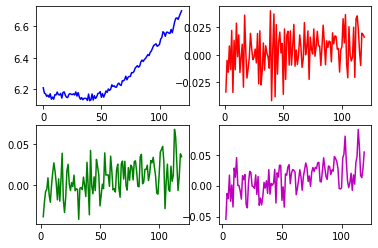

In [12]:
# 정상 시계열로 변환 3 : 차분 (로그변환 적용후)
# diff(n)
seoul['diff1'] = seoul.logs.diff(1)
seoul['diff2'] = seoul.logs.diff(2)
seoul['diff3'] = seoul.logs.diff(3)

# 그래프로 비교
fig, ax = plt.subplots(2,2)
ax[0,0].plot(seoul.logs, 'b')
ax[0,1].plot(seoul.diff1, 'r')
ax[1,0].plot(seoul.diff2, 'g')
ax[1,1].plot(seoul.diff3, 'm')

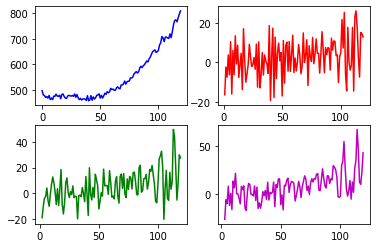

In [13]:
# 정상 시계열로 변환 3 : 차분 (기본자료에 적용) 
seoul['ndiff1'] = seoul.price.diff(1)
seoul['ndiff2'] = seoul.price.diff(2)
seoul['ndiff3'] = seoul.price.diff(3)

# 그래프로 비교
fig, ax = plt.subplots(2,2)
ax[0,0].plot(seoul.price, 'b')
ax[0,1].plot(seoul.ndiff1, 'r')
ax[1,0].plot(seoul.ndiff2, 'g')
ax[1,1].plot(seoul.ndiff3, 'm')

# 차분 1만으로도 어느정도 안정성이 보임 - 평균도 다소 일정해 보임

* 일반적인 시계열 데이터는 보통 정상성을 띄지 않음
* 정상성 조건을 만족해야 ARIMA 모형을 적용할 수 있는 기본이 됨
* ADF 검정은 정상성 여부를 알아보기 위한 검정방법
  + 시계열 데이터의 확률변수unit root가 안정적인지 알아보는 것이 목적
  + 검정에 사용하는 가설
    - 귀무가설 : 데이터에 단위근이 존재한다 (정상성 비만족)
    - 대립가설 : 데이터에 단위근이 존재하지 않는다 (정상성 만족)

In [15]:
from statsmodels.tsa.stattools import adfuller

seoul_ndiff1b = seoul.ndiff1.dropna(inplace=False)
result = adfuller(seoul_ndiff1b)

print('ADF 통계값', result[0])
print('유의확률 p-value', result[1])
print('임계구역 경계값')
for key, val in result[4].items():
  print('\t%s : %.3f' % (key, val))

ADF 통계값 0.20759502621200368
유의확률 p-value 0.9726843730196052
임계구역 경계값
	1% : -3.494
	5% : -2.889
	10% : -2.582


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


[ 1.         -0.22185631  0.09968045  0.04412248 -0.06977842  0.18367028
  0.05178879  0.1355442  -0.08732709  0.13309152 -0.03770921  0.16295491
  0.17045878 -0.03273839  0.05586533 -0.03140307  0.06819082  0.12204868
  0.09035233  0.01924724  0.09494695]


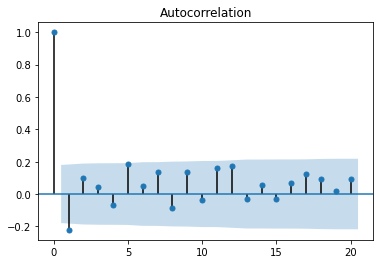

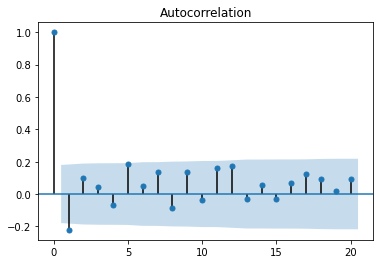

In [16]:
# 자기상관함수 ACF 시각화 => MA(1)
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

acf = sm.tsa.acf(seoul_ndiff1b, nlags=20)
print(acf)
plot_acf(seoul_ndiff1b, lags=20)

[ 1.00000000e+00 -2.23736445e-01  5.40310843e-02  8.32059444e-02
 -5.42936209e-02  1.63816204e-01  1.46802511e-01  1.81150270e-01
 -6.83313334e-02  1.07005870e-01 -1.25726969e-02  1.57635360e-01
  2.12336851e-01  6.29951508e-02 -1.73705250e-02 -2.34444730e-02
  4.72832371e-04  1.04715726e-01  8.75658538e-02  3.18249728e-02
  1.32240109e-01]


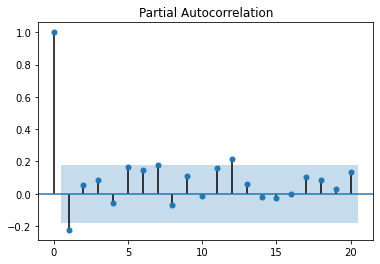

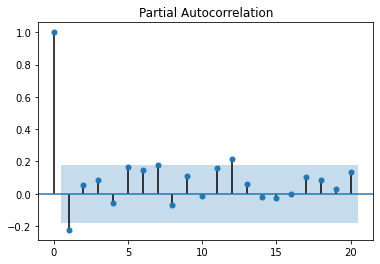

In [17]:
# 부분자기상관함수 PACF 시각화 => AR(1)
from statsmodels.graphics.tsaplots import plot_pacf

pacf = sm.tsa.pacf(seoul_ndiff1b, nlags=20)
print(pacf)
plot_pacf(seoul_ndiff1b, lags=20)

In [34]:
# ARIMA 모형 적용하기
#order= (AR, I, MA)
model = sm.tsa.ARIMA(seoul.price.tolist(), order=(1,1,1))

results = model.fit(disp=0)
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -436.856
Method:                       css-mle   S.D. of innovations              9.506
Date:                Tue, 06 Oct 2020   AIC                            881.712
Time:                        07:58:09   BIC                            892.828
Sample:                             1   HQIC                           886.226
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6320      0.727      3.622      0.000       1.208       4.056
ar.L1.D.y     -0.3396      0.278     -1.223      0.224      -0.884       0.204
ma.L1.D.y      0.1156      0.287      0.403      0.6

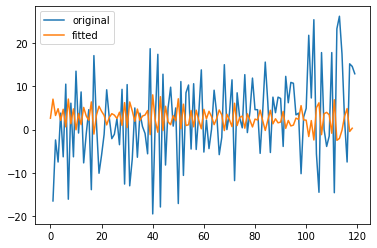

In [35]:
# 실제값과 훈련값 비교
plt.plot(seoul.ndiff1, label='original')
plt.plot(results.fittedvalues, label='fitted')
plt.legend()

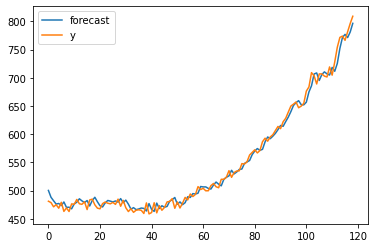

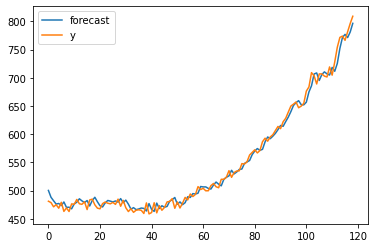

In [36]:
# 실제값과 예측값 비교
results.plot_predict()

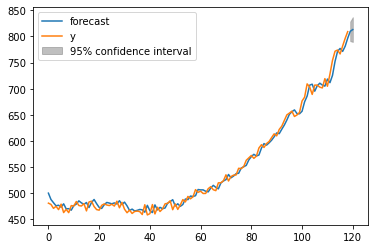

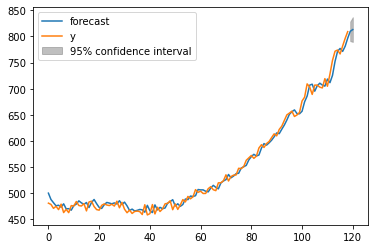

In [37]:
# 현재 시점에서 5개 이후 시점의 값 예측
# plot_predict(시작, 종료+이후시점)
results.plot_predict(1, 121)

[809.80130345 813.12283398 815.52070542 818.23220734 820.83721534]


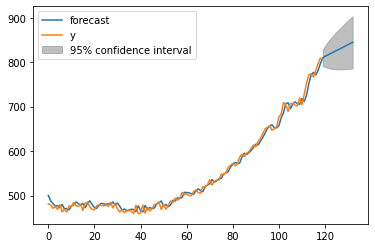

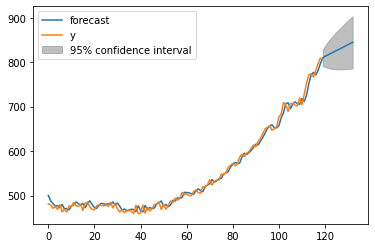

In [38]:
fc, se, conf = results.forecast(5, alpha=0.05)
print(fc)  # 5개 이후 시점의 예측값

results.plot_predict(1, 121+12)

In [28]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.6MB/s 
     |████████████████████████████████| 808kB 13.3MB/s 
     |████████████████████████████████| 2.1MB 17.2MB/s 
     |████████████████████████████████| 8.7MB 21.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 50.3.0
    Uninstalling setuptools-50.3.0:
      Successfully uninstalled setuptools-50.3.0
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [29]:
import pmdarima

# best_model = pmdarima.auto_arima(kings.value, exogenous=None,                                    
#                                  seasonal=False, stationary=False, 
#                                  m=7, information_criterion='aic', 
#                                  max_order=20,                                     
#                                  max_p=10, max_d=3, max_q=10,                                     
#                                  max_P=10, max_D=3, max_Q=10,                                   
#                                  error_action='ignore')

best_model = pmdarima.auto_arima(seoul.price, error_action='ignore')

print(best_model.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  )
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  )


                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(1, 2, 2)   Log Likelihood                -427.015
Date:                Tue, 06 Oct 2020   AIC                            862.031
Time:                        07:46:21   BIC                            873.113
Sample:                             0   HQIC                           866.530
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4346      0.139      3.119      0.002       0.162       0.708
ma.L1         -1.7640      0.102    -17.243      0.000      -1.964      -1.563
ma.L2          0.7944      0.103      7.678      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  


In [30]:
print("best model --> (p, d, q):", best_model.order, 
      " and  (P, D, Q, s):", best_model.seasonal_order)

best model --> (p, d, q): (1, 2, 2)  and  (P, D, Q, s): (0, 0, 0, 0)
